Column 'day_of_year' not found in the data.


KeyError: 177

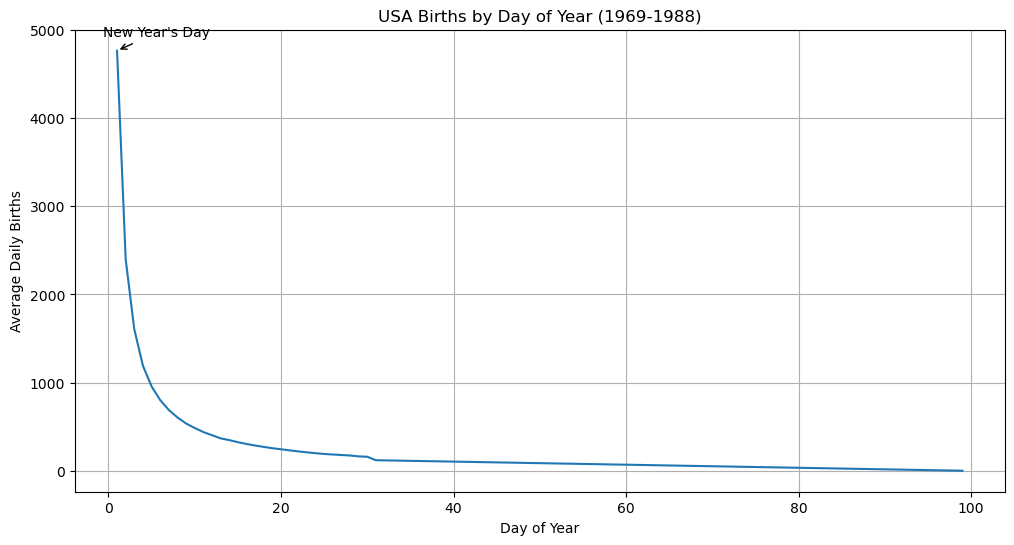

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv"
births = pd.read_csv(url)

births['daily_births'] = births['births'] / births['day']

try:
    daily_births = births.groupby('day_of_year')['daily_births'].mean()
except KeyError:
    print("Column 'day_of_year' not found in the data.")
    for col in births.columns:
        if 'day' in col.lower():
            daily_births = births.groupby(col)['daily_births'].mean()
            break
    else:
        print("No suitable column found for grouping.")

plt.figure(figsize=(12, 6))
plt.plot(daily_births.index, daily_births.values)

plt.title('USA Births by Day of Year (1969-1988)')
plt.xlabel('Day of Year')
plt.ylabel('Average Daily Births')

plt.grid(True)

holidays = {
    'New Year\'s Day': 1,
    'Independence Day': 177,
    'Labor Day': 258,
    'Halloween': 283,
    'Thanksgiving': 321,
    'Christmas': 354
}

for holiday, day in holidays.items():
    plt.annotate(holiday, xy=(day, daily_births[day]), xytext=(-10, 10), textcoords='offset points', arrowprops=dict(arrowstyle="->"))

# Show the plot
plt.show()